#Data analysis for depression  
## kaggle dataset for student depression

###Import the required libraries & Download the data

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV




###Downlaod and understand the Data

In [100]:
df = pd.read_csv('Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

We can see here that  we  should process the data first by
1-the binary on

In [27]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [28]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

###Data Preprocessing Steps:
Gender Encoding:

The "Gender" column, currently consisting of categorical values like "Male" and "Female," will be converted into a numeric format. You mentioned that you will map "Male" to 0 and "Female" to 1. This binary encoding helps convert categorical variables into numeric ones for machine learning algorithms.

Suicidal Thoughts:

The column "Have you ever had suicidal thoughts?" will be converted into a binary format (e.g., "Yes" = 1, "No" = 0). This makes it easier to analyze or model the data related to mental health and suicidal ideation.

Family History of Mental Illness:

You also plan to convert the "Family History of Mental Illness" column into a binary format (e.g., "Yes" = 1, "No" = 0). This encoding will help analyze the possible link between family history and mental health issues.

Handling Categorical Variables:

For columns such as "Profession," "Sleep Duration," "Dietary Habits," and "Degree," you plan to convert them to a range of numbers using Label Encoding. This technique converts each category in a column into a unique numeric value. For example, different professions could be mapped to numbers like 1, 2, 3, etc., based on the distinct categories in the dataset.

Numeric Variables Normalization or Scaling:

For numerical columns such as "Age," "Academic Pressure," "Work Pressure," "CGPA," "Study Satisfaction," "Job Satisfaction," and "Work/Study Hours," you could potentially apply normalization or scaling techniques to bring all the values within a similar range. This is especially useful if you're going to use machine learning algorithms that are sensitive to the scale of input features.

Missing Data Handling:

The dataset might contain some missing values, such as in the "Financial Stress" column. You could decide to fill these missing values with the median or mean values for that column, or apply other methods such as forward filling or imputation based on other columns.



In [114]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [115]:
df = df.drop('id', axis=1)
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna('Unknown', inplace=True)

columns_to_check = ['Profession', 'Sleep Duration', 'Dietary Habits', 'Degree' , 'Gender' , 'Job Satisfaction','Study Satisfaction']
for col in columns_to_check:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

yes_no_columns = [
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness',
]

for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})



df['Gender'] = df['Gender'].astype(str)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})



Unique values in Profession:
['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

Unique values in Sleep Duration:
['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']

Unique values in Dietary Habits:
['Healthy' 'Moderate' 'Unhealthy' 'Others']

Unique values in Degree:
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']

Unique values in Gender:
['Male' 'Female']

Unique values in Job Satisfaction:
[0. 3. 4. 2. 1.]

Unique values in Study Satisfaction:
[2. 5. 3. 4. 1. 0.]


In [116]:
qualitative_columns = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
                        'Family History of Mental Illness']

for column in qualitative_columns:
    print(f"Frequency distribution for {column}:")
    print(df[column].value_counts())
    print("\n")

Frequency distribution for Gender:
Gender
1    15547
0    12354
Name: count, dtype: int64


Frequency distribution for City:
City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City  

In [117]:
df['City'].unique()
#it is indian cities

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [118]:
df['City'] = df['City'].replace({
    'Khaziabad': 'Ghaziabad',
    'Nalyan': 'Kalyan',
    'Less Delhi': 'Delhi',
    'Less than 5 Kalyan': 'Kalyan'\
    })
##the city  are not very good data to have for better result we can just keep this but i want to study not just the country the other

In [119]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

categorical_cols = [
    'City', 'Profession',
    'Sleep Duration', 'Dietary Habits',
    'Degree',
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalize all columns between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

print(df.head())

   Gender       Age      City  Profession  Academic Pressure  Work Pressure  \
0     1.0  0.365854  1.000000    0.846154                1.0            0.0   
1     0.0  0.146341  0.063830    0.846154                0.4            0.0   
2     1.0  0.317073  0.851064    0.846154                0.6            0.0   
3     0.0  0.243902  0.957447    0.846154                0.6            0.0   
4     0.0  0.170732  0.340426    0.846154                0.8            0.0   

    CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  \
0  0.897                 0.4               0.0            0.00   
1  0.590                 1.0               0.0            0.00   
2  0.703                 1.0               0.0            0.50   
3  0.559                 0.4               0.0            0.25   
4  0.813                 0.6               0.0            0.00   

   Dietary Habits    Degree  Have you ever had suicidal thoughts ?  \
0        0.000000  0.111111                               

##Data Visualisation

In [120]:
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1.0,0.365854,1.000000,0.846154,1.0,0.0,0.897,0.4,0.0,0.00,0.000000,0.111111,1.0,0.250000,0.00,0.0,1.0
1,0.0,0.146341,0.063830,0.846154,0.4,0.0,0.590,1.0,0.0,0.00,0.333333,0.370370,0.0,0.250000,0.25,1.0,0.0
2,1.0,0.317073,0.851064,0.846154,0.6,0.0,0.703,1.0,0.0,0.50,0.000000,0.185185,0.0,0.750000,0.00,1.0,0.0
3,0.0,0.243902,0.957447,0.846154,0.6,0.0,0.559,0.4,0.0,0.25,0.333333,0.259259,1.0,0.333333,1.00,1.0,1.0
4,0.0,0.170732,0.340426,0.846154,0.8,0.0,0.813,0.6,0.0,0.00,0.333333,0.629630,1.0,0.083333,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.0,0.219512,0.872340,0.846154,1.0,0.0,0.575,1.0,0.0,0.00,1.000000,0.407407,1.0,0.583333,0.00,1.0,0.0
27897,1.0,0.219512,0.468085,0.846154,0.4,0.0,0.940,0.6,0.0,0.50,0.000000,0.925926,0.0,0.000000,0.50,1.0,0.0
27898,1.0,0.317073,0.191489,0.846154,0.6,0.0,0.661,0.8,0.0,0.00,1.000000,0.814815,0.0,1.000000,0.25,0.0,0.0
27899,0.0,0.000000,0.468085,0.846154,1.0,0.0,0.688,0.4,0.0,0.50,0.000000,0.407407,1.0,0.833333,1.00,0.0,1.0


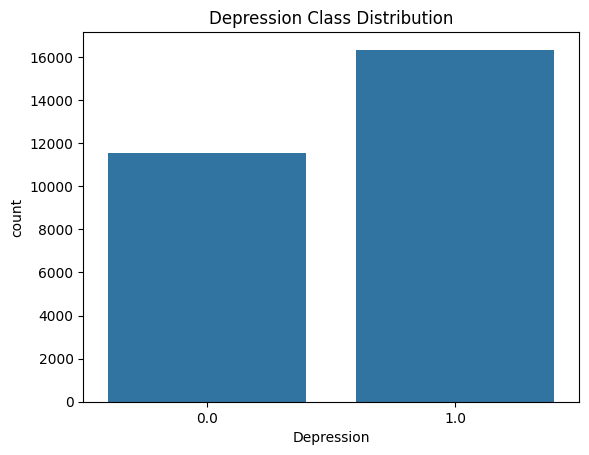

In [121]:
sns.countplot(data=df, x='Depression')
plt.title('Depression Class Distribution')
plt.show()


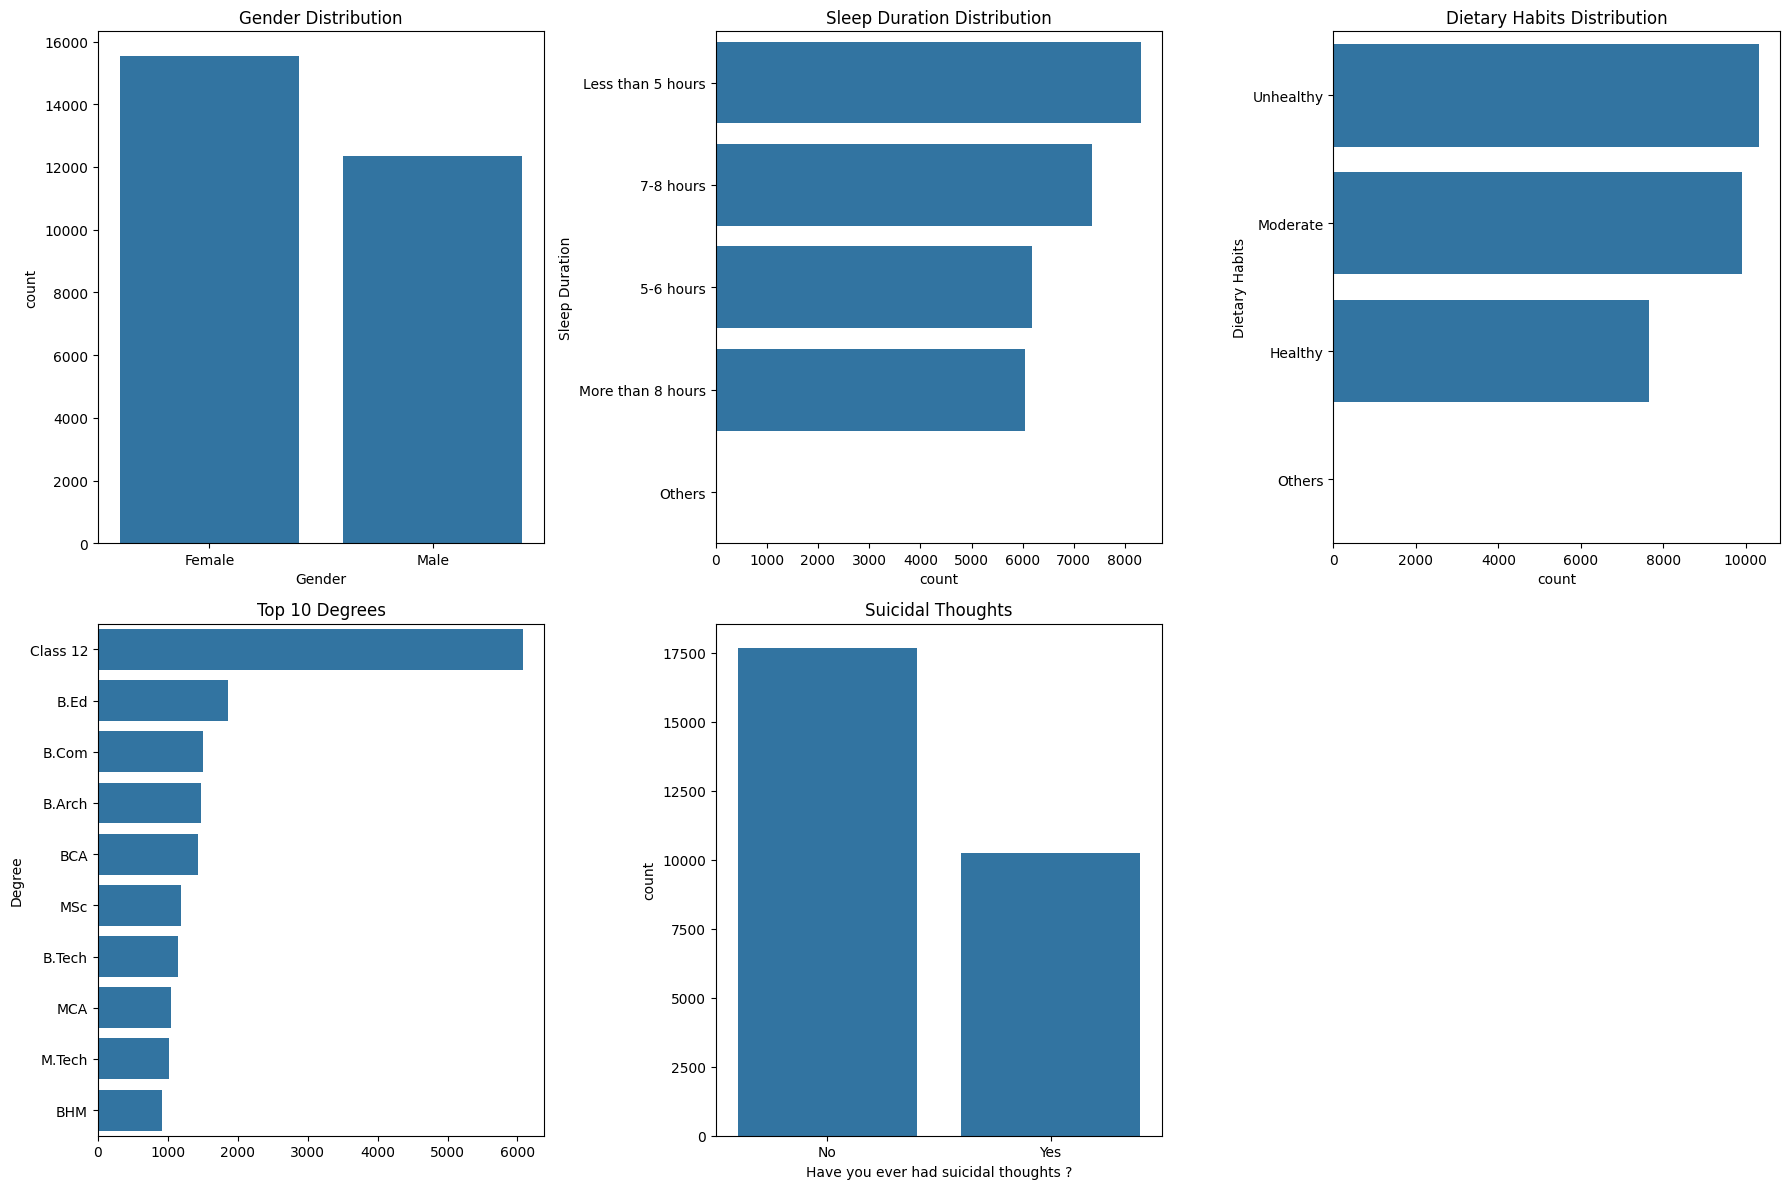

In [29]:
#here we need the orginal data
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Female', 'Male'])

# Sleep Duration Distribution
plt.subplot(2, 3, 2)
sns.countplot(y='Sleep Duration', data=df, order=df['Sleep Duration'].value_counts().index)
plt.title('Sleep Duration Distribution')

# Dietary Habits Distribution
plt.subplot(2, 3, 3)
sns.countplot(y='Dietary Habits', data=df, order=df['Dietary Habits'].value_counts().index)
plt.title('Dietary Habits Distribution')

# Degree Distribution (Top 10)
plt.subplot(2, 3, 4)
top_degrees = df['Degree'].value_counts().nlargest(10)
sns.barplot(x=top_degrees.values, y=top_degrees.index)
plt.title('Top 10 Degrees')

# Suicidal Thoughts (0=No, 1=Yes)
plt.subplot(2, 3, 5)
sns.countplot(x='Have you ever had suicidal thoughts ?', data=df)
plt.title('Suicidal Thoughts')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()



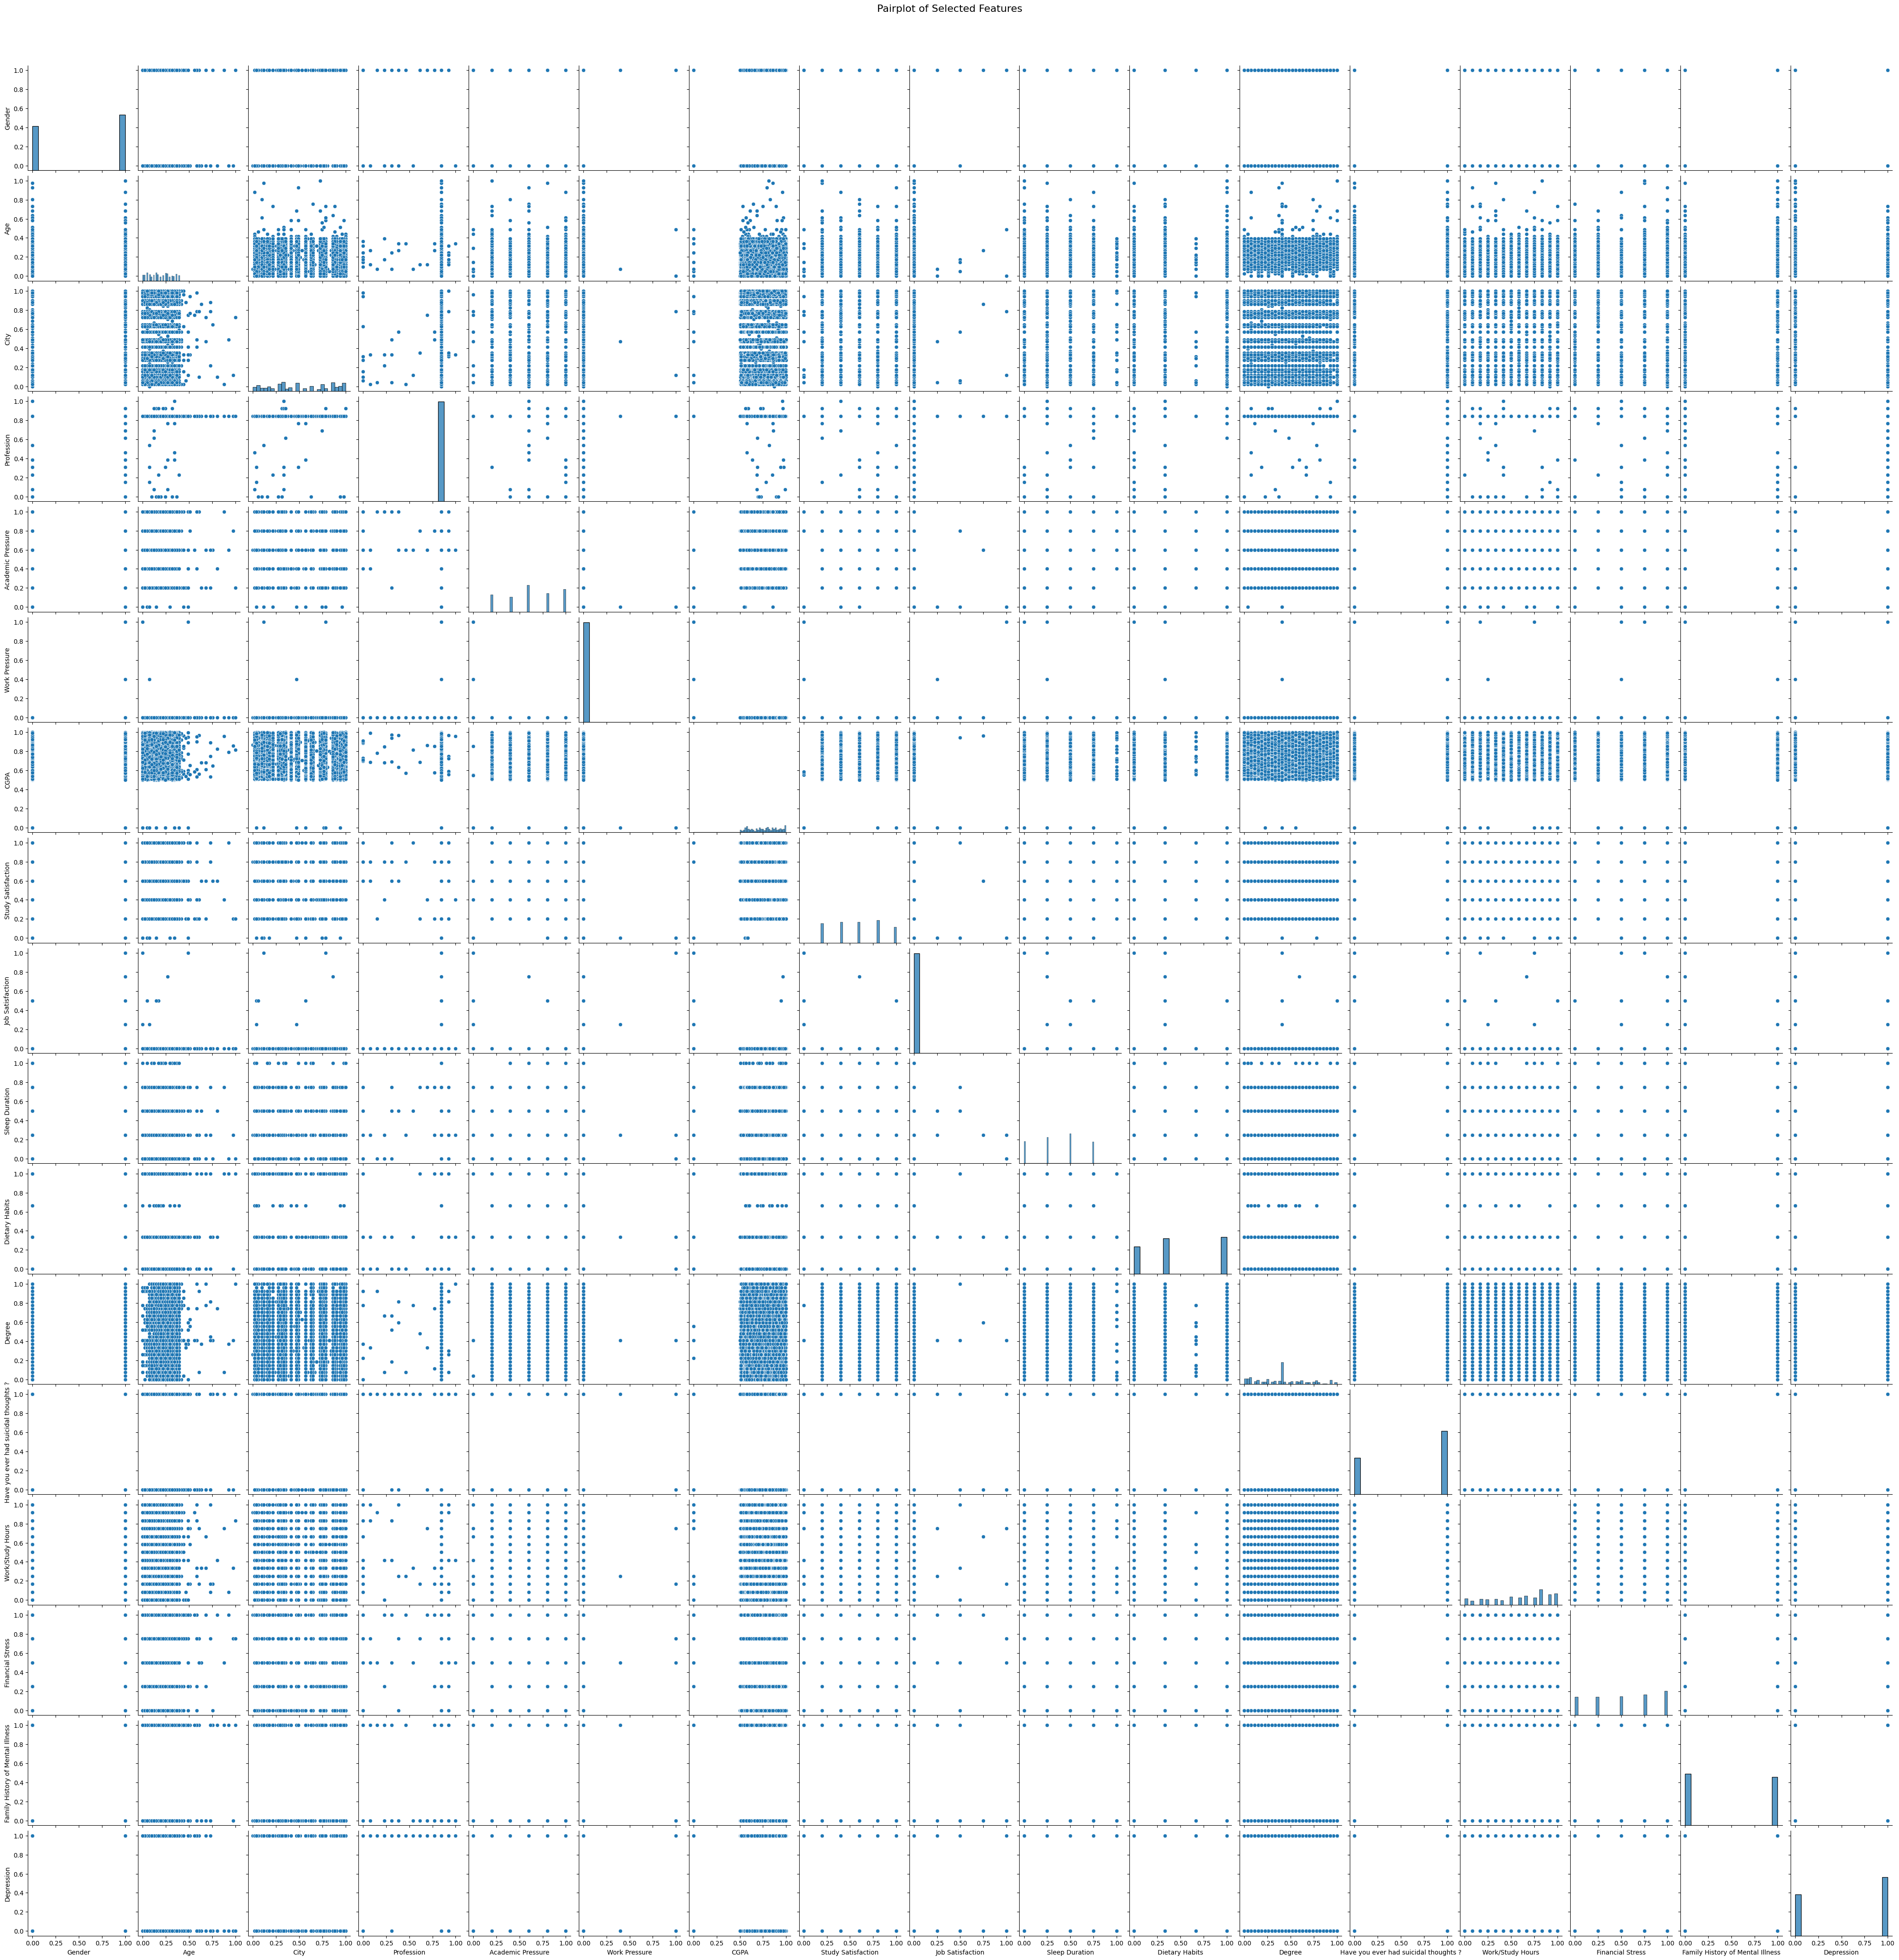

In [36]:
##here we need the data numirecal
sns.pairplot(df)
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)
plt.show()

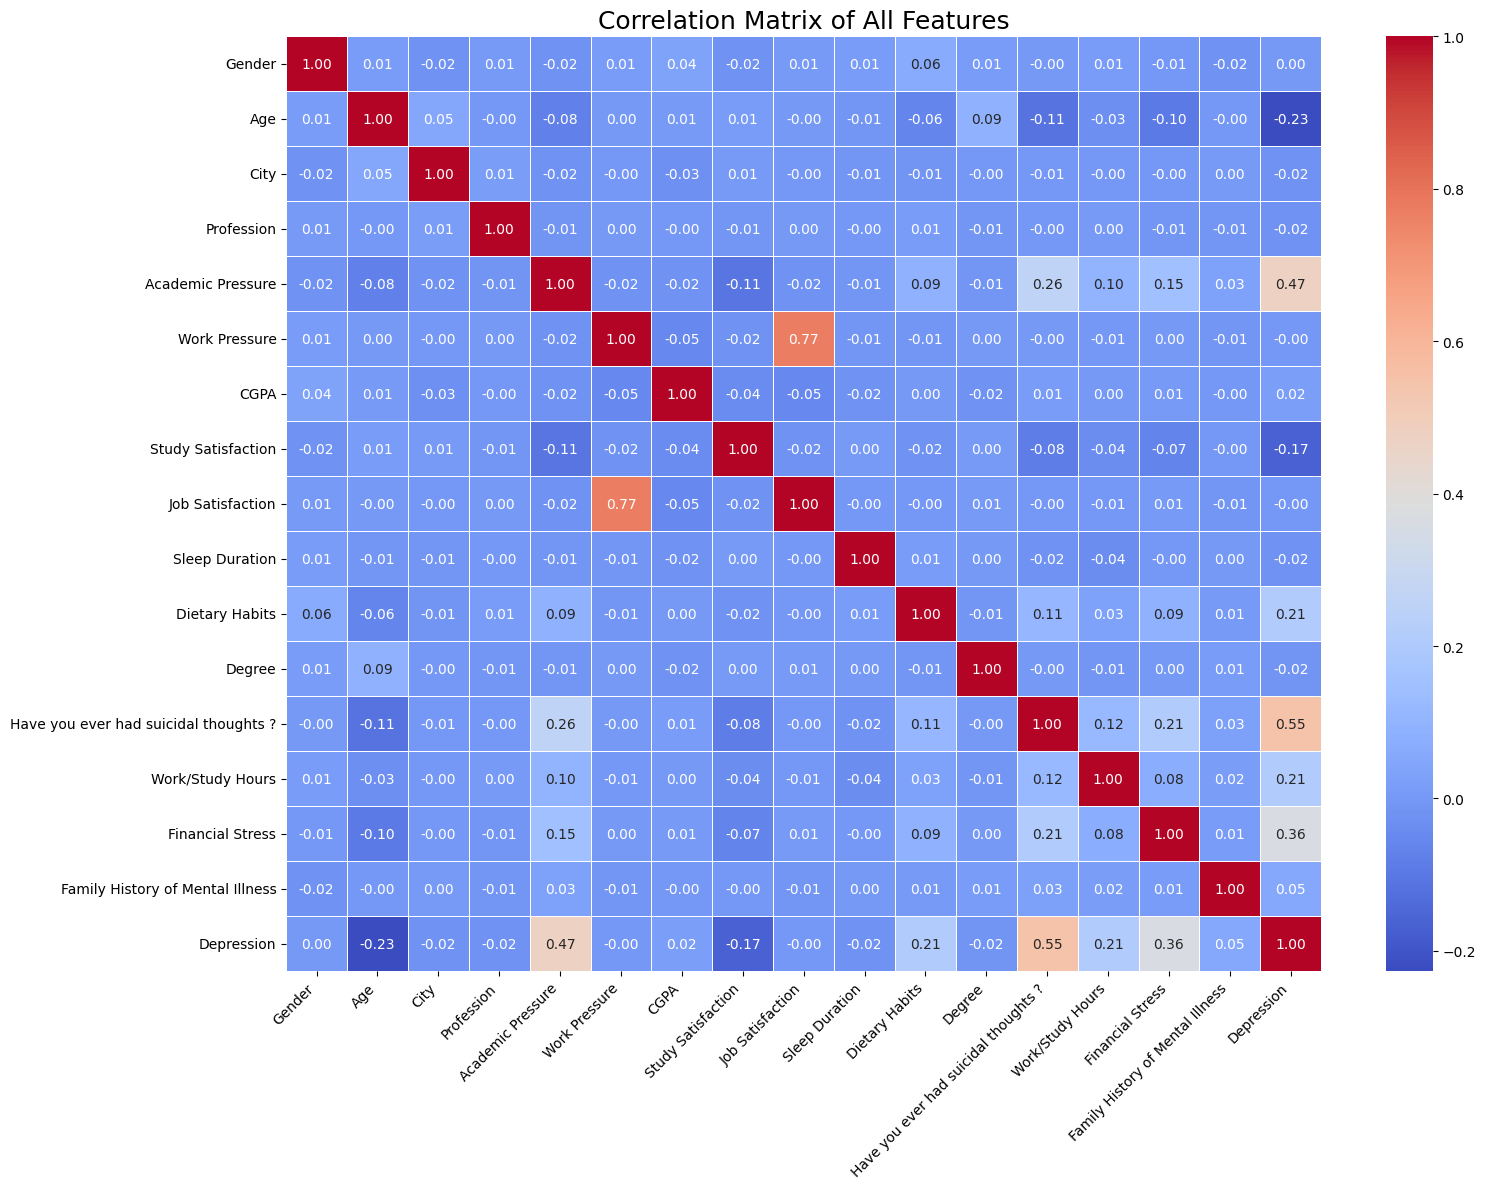

In [37]:

corr_matrix = df.corr()

plt.figure(figsize=(16, 12))

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".2f")

plt.title('Correlation Matrix of All Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


here we can see that depression is 0.55 related with  if they have ever think about suicidal ? and 0.74 with academic pressure   nice to  know that  we could consider itt in later stages

###Comparing cities which have depression

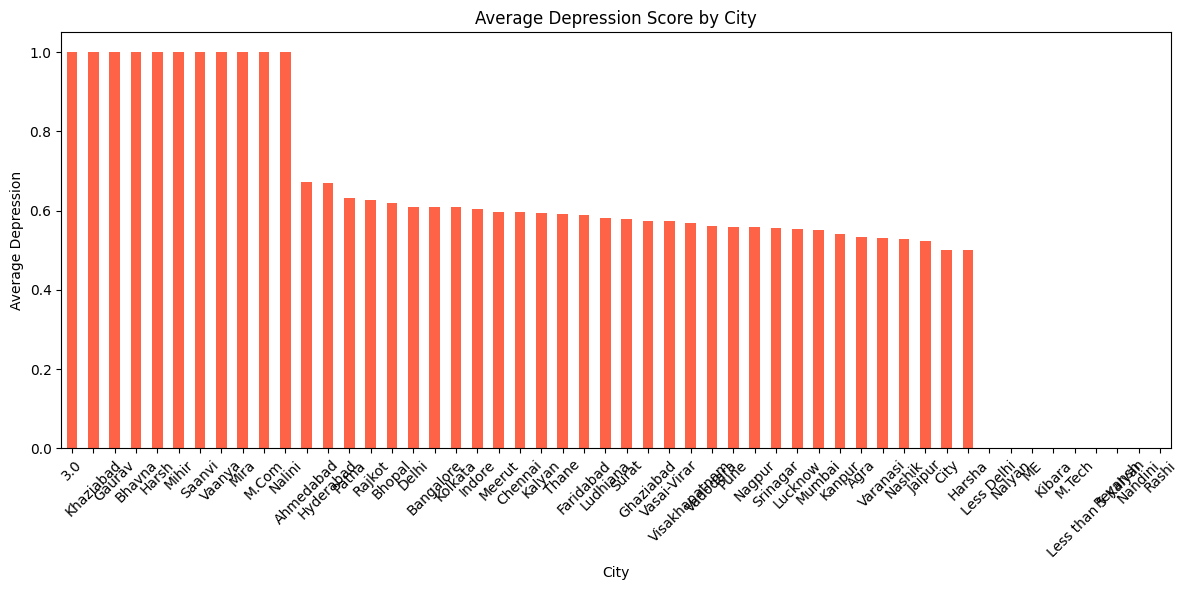

In [41]:
city_depression = df.groupby('City')['Depression'].mean().sort_values(ascending=False)

city_depression.plot(kind='bar', figsize=(12, 6), color='tomato')
plt.title('Average Depression Score by City')
plt.ylabel('Average Depression')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


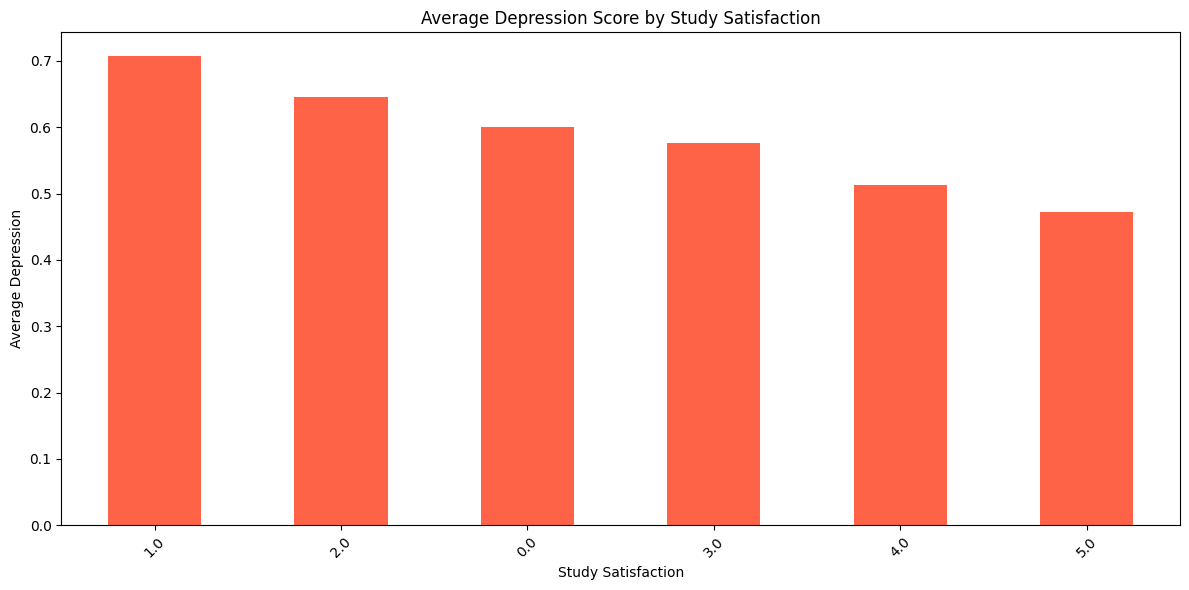

In [58]:
Study_Satisfaction_depression = df.groupby('Study Satisfaction')['Depression'].mean().sort_values(ascending=False)
Study_Satisfaction_depression.plot(kind='bar', figsize=(12, 6), color='tomato')
plt.title('Average Depression Score by Study Satisfaction')
plt.ylabel('Average Depression')
plt.xlabel('Study Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#almost the same

<ipython-input-63-efb425b10d8a>:8: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


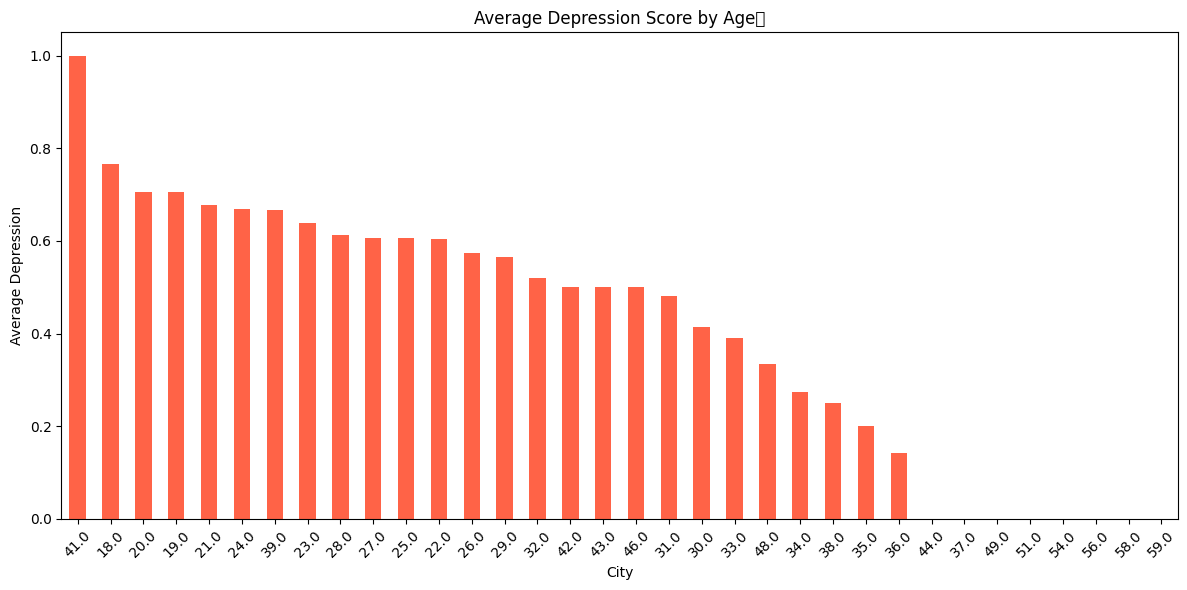

In [63]:
Age_depression = df.groupby('Age')['Depression'].mean().sort_values(ascending=False)

Age_depression.plot(kind='bar', figsize=(12, 6), color='tomato')
plt.title('Average Depression Score by Age	')
plt.ylabel('Average Depression')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

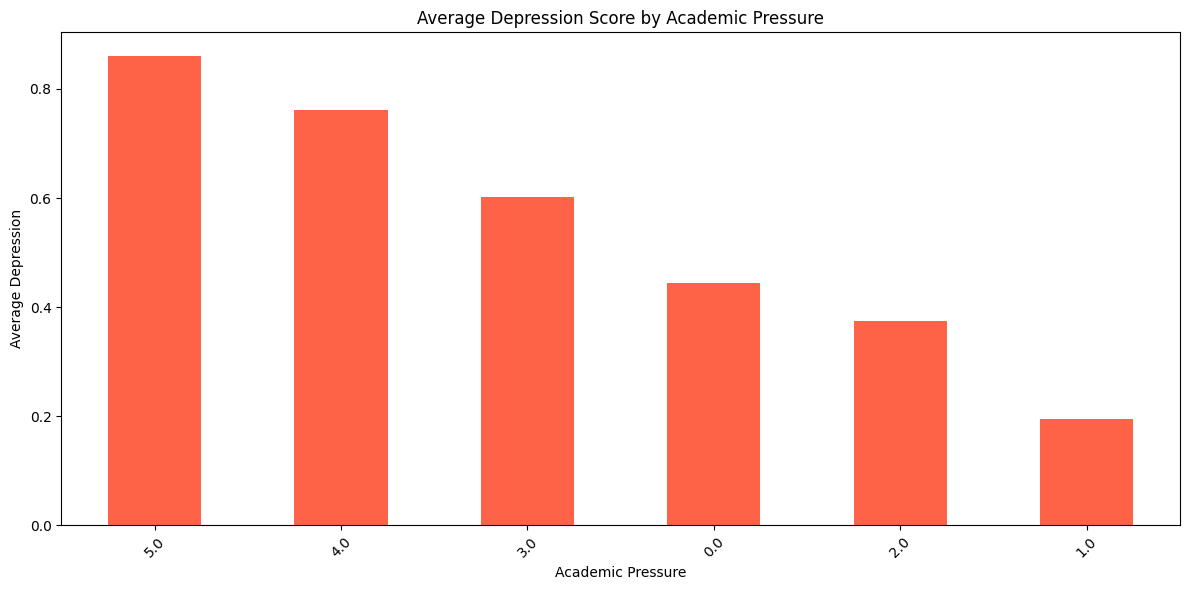

In [56]:
Academic_Pressure_depression = df.groupby('Academic Pressure')['Depression'].mean().sort_values(ascending=False)

Academic_Pressure_depression.plot(kind='bar', figsize=(12, 6), color='tomato')
plt.title('Average Depression Score by Academic Pressure')
plt.ylabel('Average Depression')
plt.xlabel('Academic Pressure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

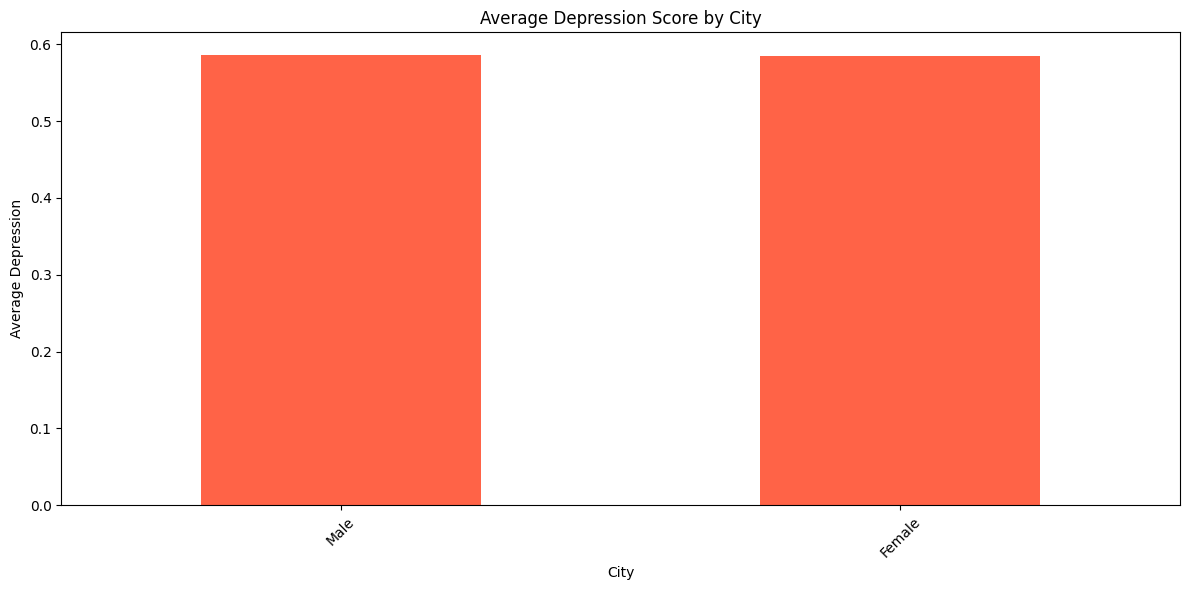

In [57]:
city_depression = df.groupby('Gender')['Depression'].mean().sort_values(ascending=False)

city_depression.plot(kind='bar', figsize=(12, 6), color='tomato')
plt.title('Average Depression Score by City')
plt.ylabel('Average Depression')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [99]:
df

,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.365854,0.846154,1.0,0.897,0.4,0.0,0.00,0.000000,0.111111,1.0,0.250000,0.00,0.0,1.0
1,0.146341,0.846154,0.4,0.590,1.0,0.0,0.00,0.333333,0.370370,0.0,0.250000,0.25,1.0,0.0
2,0.317073,0.846154,0.6,0.703,1.0,0.0,0.50,0.000000,0.185185,0.0,0.750000,0.00,1.0,0.0
3,0.243902,0.846154,0.6,0.559,0.4,0.0,0.25,0.333333,0.259259,1.0,0.333333,1.00,1.0,1.0
4,0.170732,0.846154,0.8,0.813,0.6,0.0,0.00,0.333333,0.629630,1.0,0.083333,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.219512,0.846154,1.0,0.575,1.0,0.0,0.00,1.000000,0.407407,1.0,0.583333,0.00,1.0,0.0
27897,0.219512,0.846154,0.4,0.940,0.6,0.0,0.50,0.000000,0.925926,0.0,0.000000,0.50,1.0,0.0
27898,0.317073,0.846154,0.6,0.661,0.8,0.0,0.00,1.000000,0.814815,0.0,1.000000,0.25,0.0,0.0
27899,0.000000,0.846154,1.0,0.688,0.4,0.0,0.50,0.000000,0.407407,1.0,0.833333,1.00,0.0,1.0


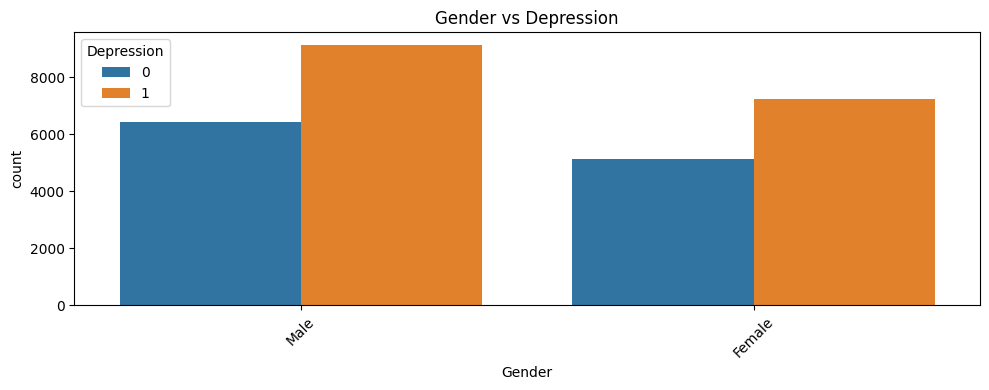

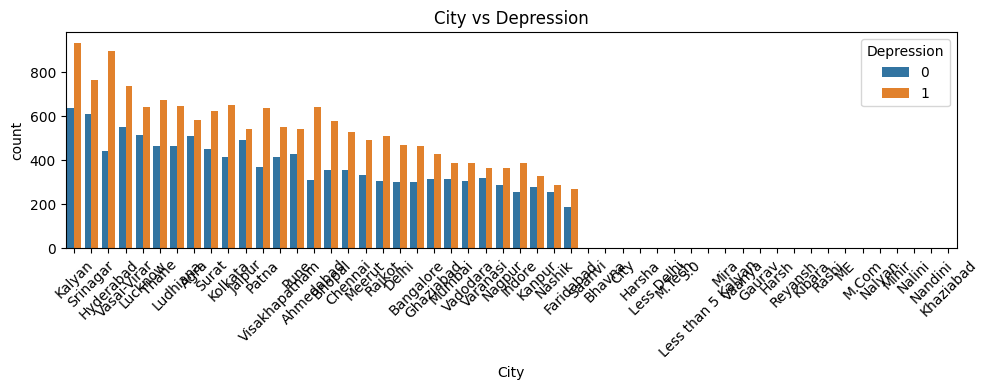

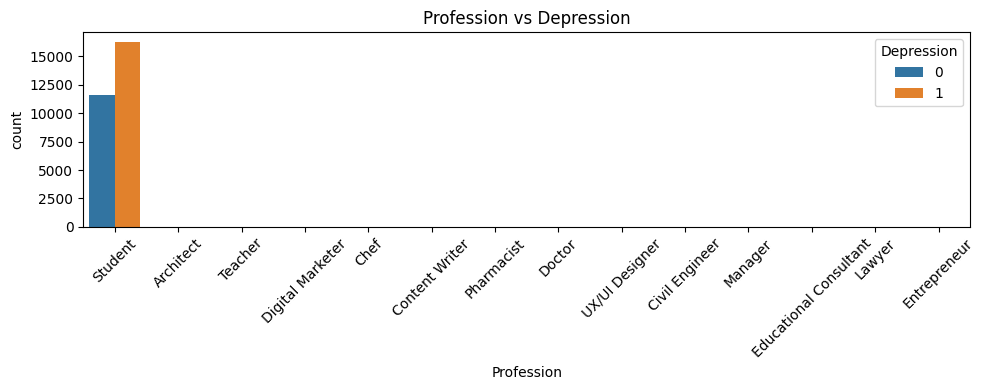

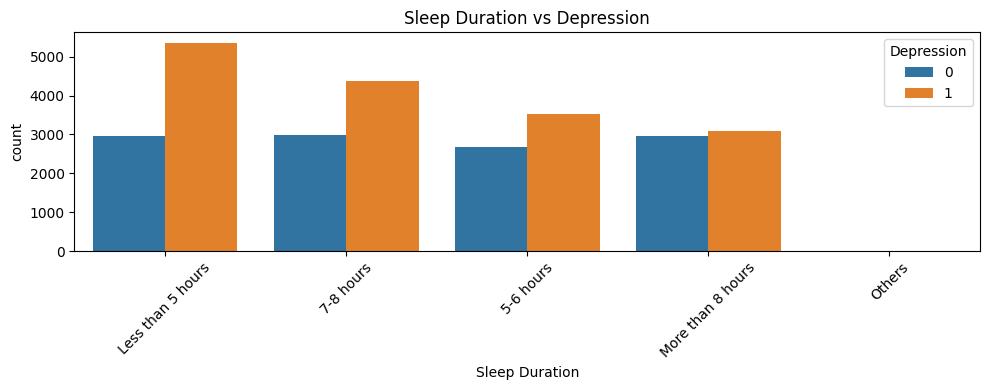

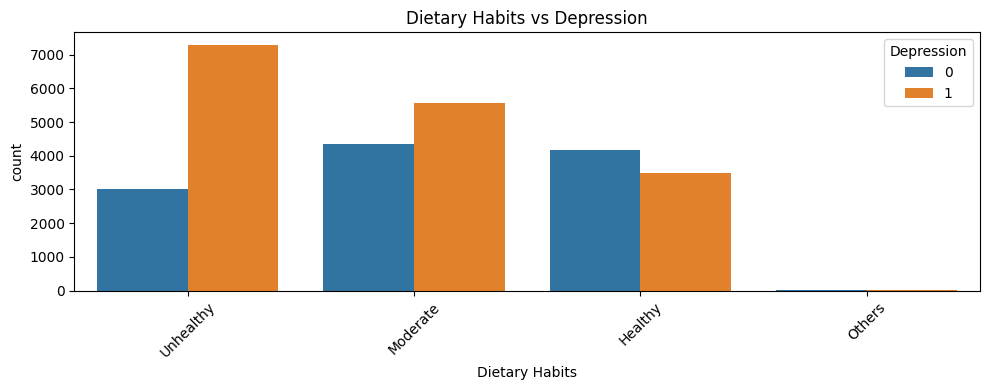

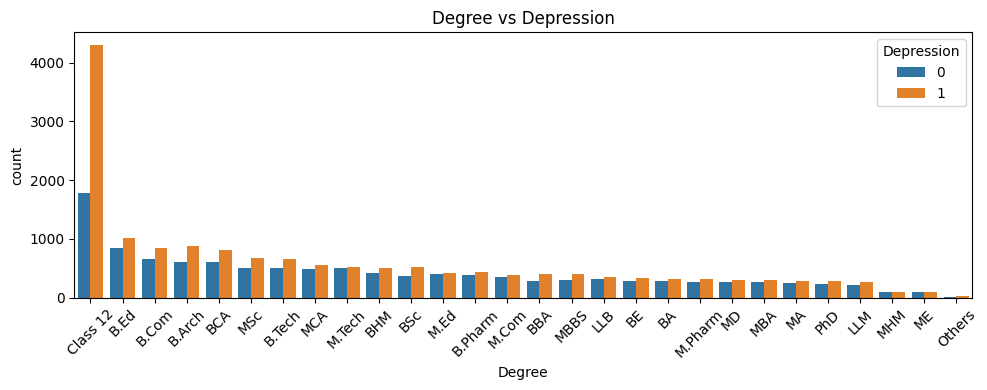

In [101]:
categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='Depression', order=df[col].value_counts().index)
    plt.title(f'{col} vs Depression')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#####so here we can conclude something and from the corr ,
we can't conclude anything from gender
city: there is cities which have depression more than others . but there is name of cities not valid so we can't be sure about this
for profession we recognized that we have daata just for students 🧑
and the sleep duration if less than 5 hours it effects
and if the pesion unhealthy  also
and if class 12 means more pressure maybe most of the data came from the 12 class


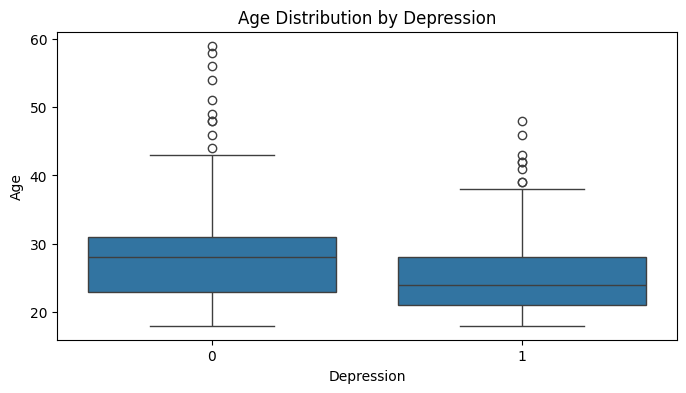

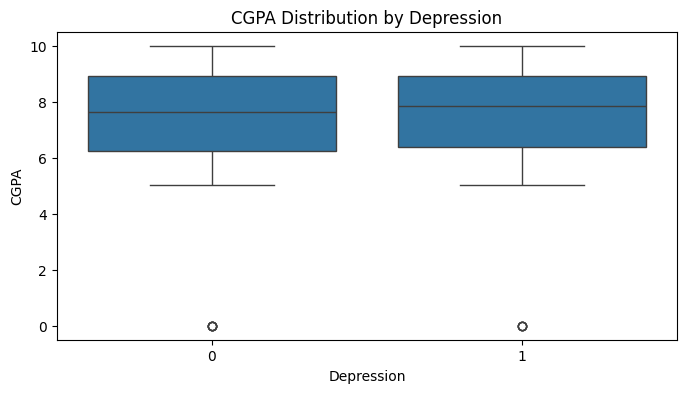

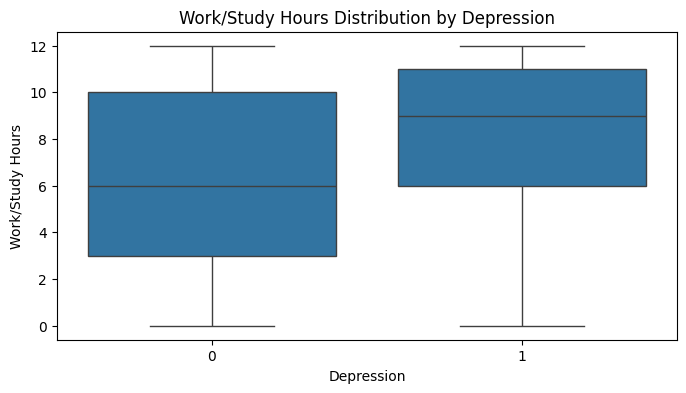

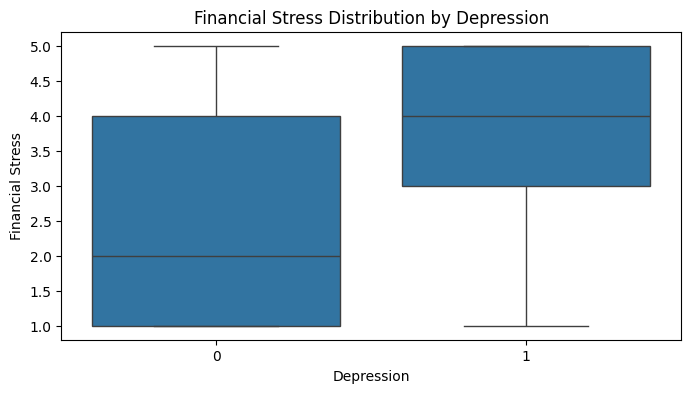

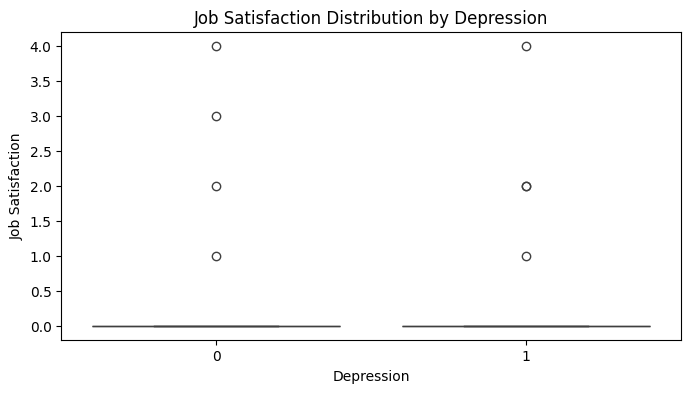

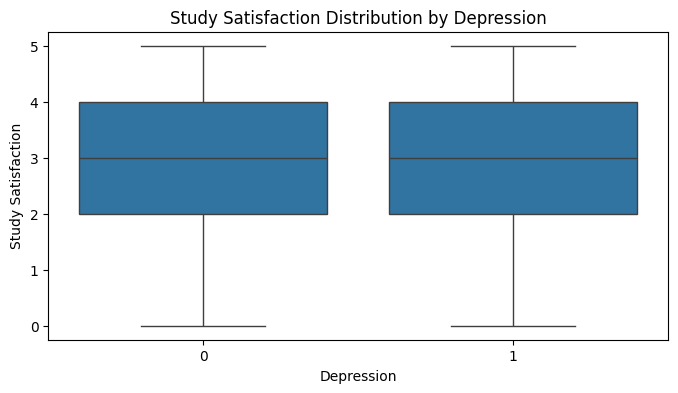

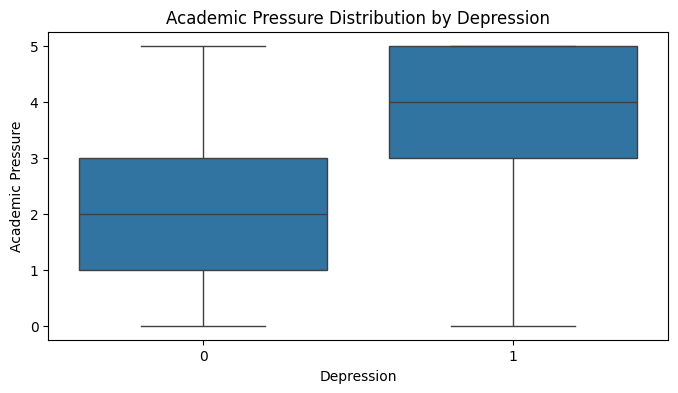

In [103]:
numerical_cols = ['Age', 'CGPA', 'Work/Study Hours', 'Financial Stress',
                  'Job Satisfaction', 'Study Satisfaction', 'Academic Pressure']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Depression', y=col, data=df)
    plt.title(f'{col} Distribution by Depression')
    plt.show()

here we notice the similar result in some of the plots but in the academic pressure  there is many difference   cause at class 12  they choseing there major

In [104]:
depressed_df = df[df['Depression'] == 1]

class_12_count = depressed_df[depressed_df['Degree'] == 'Class 12'].shape[0]

total_depressed = depressed_df.shape[0]

proportion = class_12_count / total_depressed

print(f"Proportion of depressed individuals in 'Class 12': {proportion:.2%}")

Proportion of depressed individuals in 'Class 12': 26.34%


In [105]:
depressed_df = df[df['Depression'] == 1]
suicidal_count = depressed_df[depressed_df['Have you ever had suicidal thoughts ?'] == 'Yes'].shape[0]
total_depressed = depressed_df.shape[0]

print(f"Number of depressed individuals with suicidal thoughts: {suicidal_count}")
print(f"Proportion: {suicidal_count / total_depressed:.2%}")

Number of depressed individuals with suicidal thoughts: 13957
Proportion: 85.44%


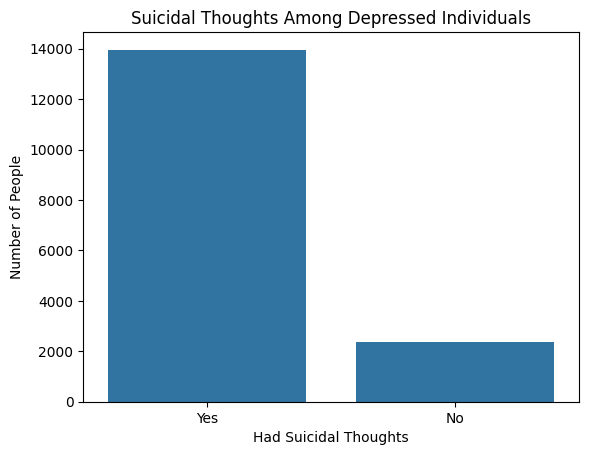

In [106]:
suicidal_counts = depressed_df['Have you ever had suicidal thoughts ?'].value_counts()

sns.barplot(x=suicidal_counts.index, y=suicidal_counts.values)
plt.title('Suicidal Thoughts Among Depressed Individuals')
plt.ylabel('Number of People')
plt.xlabel('Had Suicidal Thoughts')
plt.show()

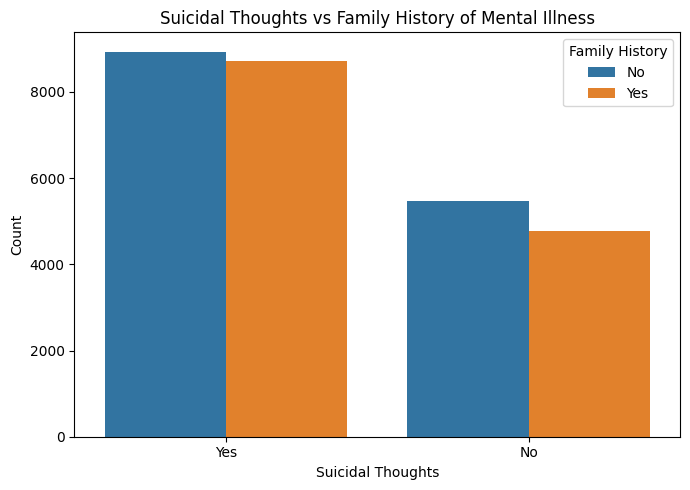

In [107]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df,
              x='Have you ever had suicidal thoughts ?',
              hue='Family History of Mental Illness')
plt.title('Suicidal Thoughts vs Family History of Mental Illness')
plt.ylabel('Count')
plt.xlabel('Suicidal Thoughts')
plt.legend(title='Family History')
plt.tight_layout()
plt.show()

In [109]:
st_fam_prop = pd.crosstab(df['Have you ever had suicidal thoughts ?'],
                          df['Family History of Mental Illness'],
                          normalize='index') * 100

print("Proportion of Family History within Suicidal Thoughts:")
print(st_fam_prop)

Proportion of Family History within Suicidal Thoughts:
Family History of Mental Illness              No        Yes
Have you ever had suicidal thoughts ?                      
No                                     53.323572  46.676428
Yes                                    50.606026  49.393974


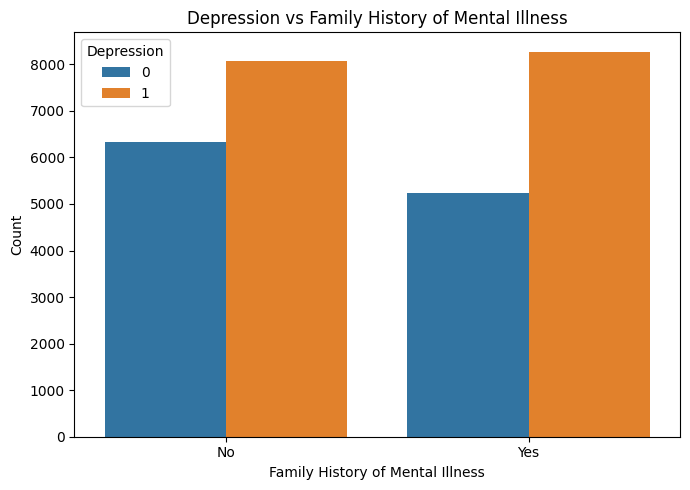

In [108]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df,
              x='Family History of Mental Illness',
              hue='Depression')
plt.title('Depression vs Family History of Mental Illness')
plt.ylabel('Count')
plt.xlabel('Family History of Mental Illness')
plt.legend(title='Depression')
plt.tight_layout()
plt.show()


In [110]:
dep_fam_prop = pd.crosstab(df['Depression'],
                           df['Family History of Mental Illness'],
                           normalize='index') * 100

print("\nProportion of Family History within Depression:")
print(dep_fam_prop)


Proportion of Family History within Depression:
Family History of Mental Illness         No        Yes
Depression                                            
0                                 54.777345  45.222655
1                                 49.357248  50.642752


##Training the models

In [124]:
X = df.drop('Depression', axis=1)
y = df['Depression']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

####Trying out
1- Logistic Regression

2- SVM

3-Random Forest

4- Gradient Boosting

5- KNN

In [72]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81      3505
         1.0       0.85      0.88      0.87      4866

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.84      8371
weighted avg       0.84      0.84      0.84      8371

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80      3505
         1.0       0.84      0.88      0.86      4866

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.83      8371
weighted avg       0.84      0.84      0.84      8371

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      3505
         1.0       0.85      0.87      0.86      4866

    accuracy                           0.83      8371
   macro avg       0.

####Random forest with Gridsearch cv

In [74]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best Parameters:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.8466973886328724


###Logistic Regression with GridSearch

In [75]:
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}
logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best  and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Best score: 0.8475678443420378


###SVM with GridSearch

In [76]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC()

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best score for SVM:", grid_search_svm.best_score_)

Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVM: 0.8490015360983103


###cross_val_score

In [77]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()} ± {cv_scores.std()}")


Cross-validation scores: [0.84920635 0.85483871 0.83896569 0.84383001 0.84792627]
Mean accuracy: 0.8469534050179212 ± 0.005324648447047909


In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_bagging = RandomForestClassifier(n_estimators=100, random_state=42)

rf_bagging.fit(X_train, y_train)

# Check performance
print("Accuracy on training set:", rf_bagging.score(X_train, y_train))
print("Accuracy on test set:", rf_bagging.score(X_test, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.8329948632182534


Bagging logistic and  svm and  random forest  stacking

In [82]:
base_models = [
    ('logreg', LogisticRegression(max_iter=500)),
    ('svm', SVC(kernel='linear')),
    ('rf', RandomForestClassifier(n_estimators=100))
]


stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

print("Accuracy on test set:", stacking_model.score(X_test, y_test))

Accuracy on test set: 0.8419543662644845


###Voting Classifier

In [84]:
from sklearn.ensemble import VotingClassifier

logreg = LogisticRegression(max_iter=500)
svm = SVC(kernel='linear')
rf = RandomForestClassifier(n_estimators=100)

voting_model = VotingClassifier(estimators=[('logreg', logreg), ('svm', svm), ('rf', rf)], voting='hard')

voting_model.fit(X_train, y_train)

print("Accuracy on test set:", voting_model.score(X_test, y_test))


Accuracy on test set: 0.8417154461832517


In [87]:
from sklearn.ensemble import VotingClassifier



logreg = LogisticRegression(max_iter=500)
svm = SVC(probability=True, kernel='linear')
rf = RandomForestClassifier(n_estimators=100)

voting_model = VotingClassifier(estimators=[('logreg', logreg), ('svm', svm), ('rf', rf)], voting='soft')

voting_model.fit(X_train, y_train)

print("Accuracy on test set:", voting_model.score(X_test, y_test))



Accuracy on test set: 0.8414765261020188


In [86]:
from sklearn.neural_network import MLPClassifier

# Create a neural network model
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Check performance
print("Accuracy on test set:", mlp.score(X_test, y_test))


Accuracy on test set: 0.8405208457770875


In [88]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(voting_model, X, y, cv=5)
print("Cross-validation accuracy:", cv_scores.mean(), "±", cv_scores.std())

Cross-validation accuracy: 0.8471741552720797 ± 0.004128830992224278


In [91]:
#df = df.drop(columns=['City', 'Gender', 'Work Pressure'])
X = df.drop('Depression', axis=1)
y = df['Depression']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(voting_model, X, y, cv=5)
print("Cross-validation accuracy:", cv_scores.mean(), "±", cv_scores.std())

Cross-validation accuracy: 0.8462423005858973 ± 0.004113664207391641


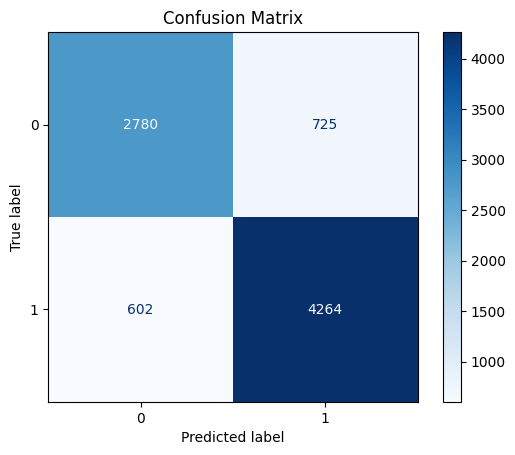

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = voting_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

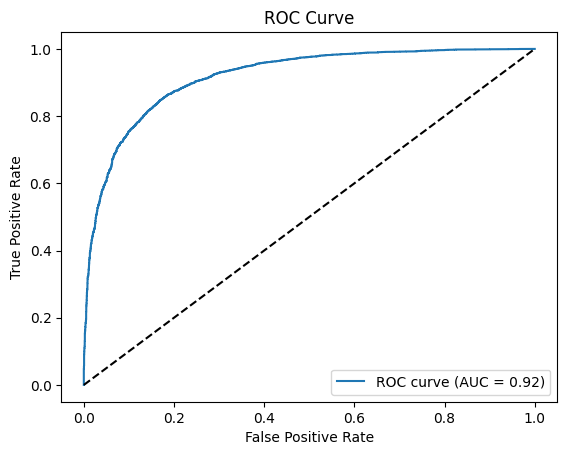

In [127]:
from sklearn.metrics import roc_curve, auc

# Get probabilities (ensure all models support predict_proba)
y_proba = voting_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



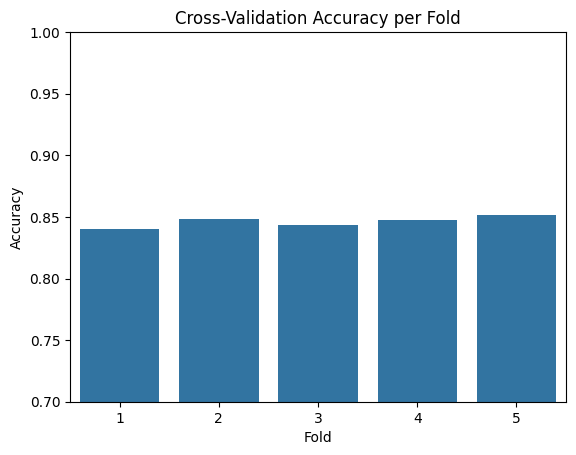

In [128]:
sns.barplot(x=list(range(1, 6)), y=cv_scores)
plt.title("Cross-Validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.show()

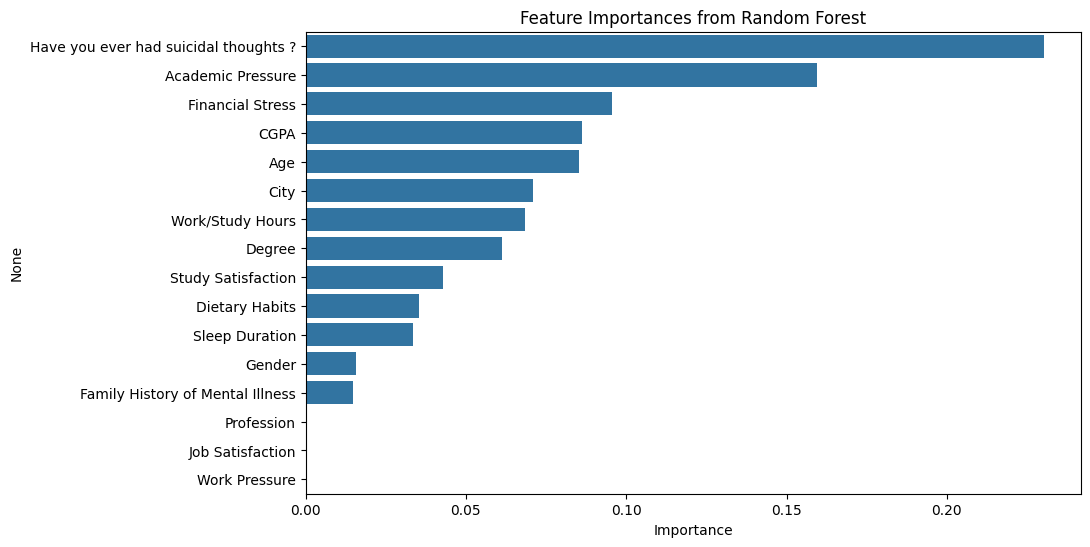

In [129]:
rf_model = voting_model.named_estimators_['rf']

importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.show()